In [5]:
import pandas as pd                                     # To work on data manipulation 
import numpy as np                                      # It is used for numerical python
import seaborn as sns                                   # For Visualization
import matplotlib.pyplot as plt                         # For Visualization
from sklearn.model_selection import train_test_split    # To split the data (train and test)
from sklearn.linear_model import SGDRegressor           # To build the model (S.G.D)
from sklearn.preprocessing import StandardScaler        # To convert the predictor to the same scale(To scale down the data where mean =0 and std = 1) 
from sklearn.metrics import mean_squared_error          # To find the MSE (error)   To check the performance of your model 
from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
df=pd.read_csv(r"C:\Users\Asus\Downloads\car_price_dataset.csv")

In [23]:
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [9]:
df.columns

Index(['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage', 'Doors', 'Owner_Count', 'Price'],
      dtype='object')

In [11]:
df.head(3)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171


In [13]:
df.shape

(10000, 10)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [17]:
df.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [19]:
null_cols=df.isnull().sum()
null_df=null_cols[null_cols>0].reset_index()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [23]:
df.head(3)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171


In [25]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [27]:
df.columns

Index(['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage', 'Doors', 'Owner_Count', 'Price'],
      dtype='object')

In [29]:
df[['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'Price']].corr

<bound method DataFrame.corr of       Year  Engine_Size  Mileage  Doors  Owner_Count  Price
0     2020          4.2   289944      3            5   8501
1     2012          2.0     5356      2            3  12092
2     2020          4.2   231440      4            2  11171
3     2023          2.0   160971      2            1  11780
4     2003          2.6   286618      3            3   2867
...    ...          ...      ...    ...          ...    ...
9995  2004          3.7     5794      2            4   8884
9996  2002          1.4   168000      2            1   6240
9997  2010          3.0    86664      5            1   9866
9998  2002          1.4   225772      4            1   4084
9999  2001          2.1   157882      3            3   3342

[10000 rows x 6 columns]>

In [31]:
df.describe().columns

Index(['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'Price'], dtype='object')

<Axes: >

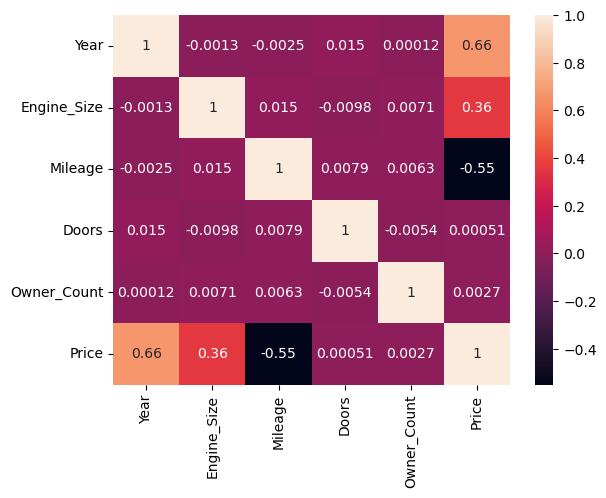

In [33]:
sns.heatmap(df[['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'Price']].corr(),annot=True)

In [35]:
df.head(3)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171


In [37]:
df.drop(['Brand', 'Doors'],axis=1)

,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Owner_Count,Price
0,Rio,2020,4.2,Diesel,Manual,289944,5,8501
1,Malibu,2012,2.0,Hybrid,Automatic,5356,3,12092
2,GLA,2020,4.2,Diesel,Automatic,231440,2,11171
3,Q5,2023,2.0,Electric,Manual,160971,1,11780
4,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,2867
...,...,...,...,...,...,...,...,...
9995,Optima,2004,3.7,Diesel,Semi-Automatic,5794,4,8884
9996,Impala,2002,1.4,Electric,Automatic,168000,1,6240
9997,3 Series,2010,3.0,Petrol,Automatic,86664,1,9866
9998,Explorer,2002,1.4,Hybrid,Automatic,225772,1,4084


<Axes: xlabel='Price'>

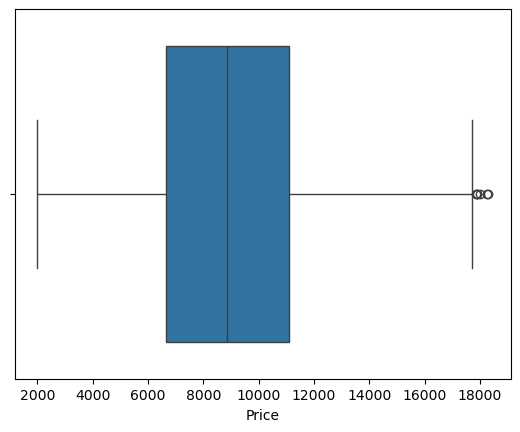

In [39]:
sns.boxplot(x=df['Price'])

(array([ 490.,  873., 1396., 1821., 1939., 1637., 1102.,  536.,  174.,
          32.]),
 array([ 2000. ,  3630.1,  5260.2,  6890.3,  8520.4, 10150.5, 11780.6,
        13410.7, 15040.8, 16670.9, 18301. ]),
 <BarContainer object of 10 artists>)

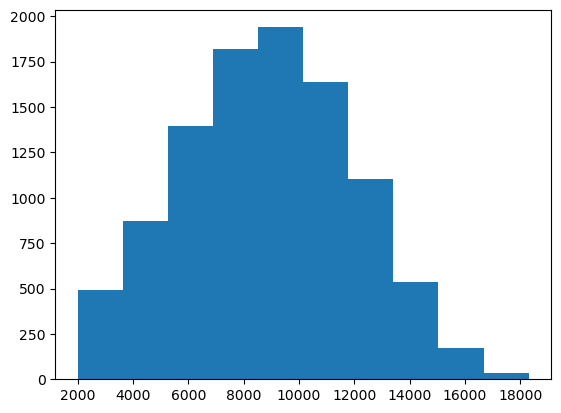

In [41]:
plt.hist(df['Price'])

In [43]:
cat_cols=df.describe(include='object').columns.to_list()
print(cat_cols)

['Brand', 'Model', 'Fuel_Type', 'Transmission']


In [45]:
cat_cols + ['Tyre size']

['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Tyre size']

In [47]:
for i in cat_cols:
    print(df[i].value_counts())
    print(df[i].unique())
    print(df[i].nunique())
    print(df.groupby(i)['Price'].mean())
    print('---',30)

Brand
Ford          1048
Audi          1038
Volkswagen    1020
Honda         1009
Chevrolet     1003
BMW            999
Hyundai        995
Kia            976
Toyota         970
Mercedes       942
Name: count, dtype: int64
['Kia' 'Chevrolet' 'Mercedes' 'Audi' 'Volkswagen' 'Toyota' 'Honda' 'BMW'
 'Hyundai' 'Ford']
10
Brand
Audi          8929.373796
BMW           8704.068068
Chevrolet     9015.683948
Ford          8852.570611
Honda         8665.596630
Hyundai       8778.279397
Kia           8880.086066
Mercedes      8980.087049
Toyota        8798.184536
Volkswagen    8928.377451
Name: Price, dtype: float64
--- 30
Model
Accord      365
Fiesta      363
Impala      355
5 Series    353
Tiguan      352
Focus       351
Q5          350
A4          350
Elantra     347
Golf        339
A3          338
Optima      336
Civic       336
3 Series    335
Explorer    334
Malibu      333
Tucson      329
Passat      329
Rio         327
Corolla     325
RAV4        324
Camry       321
E-Class     321
Sonata  

In [49]:
df1=df.copy(deep=True)

In [51]:
df_e= pd.get_dummies(df,drop_first=True).astype('int')

In [53]:
df_e.shape

(10000, 49)

In [55]:
from sklearn.model_selection import train_test_split

In [57]:
from sklearn.preprocessing import StandardScaler

In [59]:
X=df_e.drop('Price',axis=1)
y=df_e['Price']

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [63]:
from sklearn.linear_model import LinearRegression

In [65]:
lr=LinearRegression()

In [67]:
lr.fit(X_train,y_train)

LinearRegression()

In [69]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

In [71]:
from sklearn.metrics import r2_score

In [73]:
r2_score(y_train,y_train_pred)

0.9912132722407957

In [75]:
r2_score(y_test,y_test_pred)

0.9909214216785152

In [77]:
df.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [81]:
df[df.duplicated()]

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price


In [83]:
from sklearn.tree import DecisionTreeRegressor

In [85]:
model2=DecisionTreeRegressor()

In [87]:
model2.fit(X_train,y_train)

DecisionTreeRegressor()

In [89]:
y_train_pred=model2.predict(X_train)
y_test_pred=model2.predict(X_test)

In [91]:
r2_score(y_train,y_train_pred)

1.0

In [93]:
r2_score(y_test,y_test_pred)

0.9130833959733201

In [95]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
model3=RandomForestRegressor(n_estimators=500,max_depth=3)

In [100]:
model3.fit(X_train,y_train)

RandomForestRegressor(max_depth=3, n_estimators=500)

In [102]:
y_train_pred=model3.predict(X_train)

In [104]:
y_test_pred=model3.predict(X_test)

In [106]:
r2_score(y_train,y_train_pred)


0.7195120661320805

In [108]:
r2_score(y_test,y_test_pred)

0.7112855014165376